In [140]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [143]:
#Read in the csv file and convert to a Pandas dataframe
World_Happiness_2015 = pd.read_csv("datafrom_2015.csv ")
World_Happiness_2016 = pd.read_csv("datafrom_2016.csv ")
World_Happiness_2017 = pd.read_csv("datafrom_2017.csv ")
World_Happiness_2018 = pd.read_csv("datafrom_2018.csv ")
World_Happiness_2019 = pd.read_csv("datafrom_2019.csv ")


In [145]:
# mearge all dataframes 
World_Happiness = pd.concat([World_Happiness_2015,World_Happiness_2016,World_Happiness_2017,World_Happiness_2018,World_Happiness_2019])


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [147]:
World_Happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,152.0,Rwanda,3.334,0.359,0.711,0.614,0.555,0.411
152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,153.0,Tanzania,3.231,0.476,0.885,0.499,0.417,0.147
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,154.0,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.025
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,155.0,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.035


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [149]:
World_Happiness.info

<bound method DataFrame.info of          Country          Region  Happiness Rank  Happiness Score  \
0    Switzerland  Western Europe             1.0            7.587   
1        Iceland  Western Europe             2.0            7.561   
2        Denmark  Western Europe             3.0            7.527   
3         Norway  Western Europe             4.0            7.522   
4         Canada   North America             5.0            7.427   
..           ...             ...             ...              ...   
151          NaN             NaN             NaN              NaN   
152          NaN             NaN             NaN              NaN   
153          NaN             NaN             NaN              NaN   
154          NaN             NaN             NaN              NaN   
155          NaN             NaN             NaN              NaN   

     Standard Error  Economy (GDP per Capita)   Family  \
0           0.03411                   1.39651  1.34951   
1           0.04884    

In [150]:
World_Happiness.shape

(782, 30)

In [151]:
World_Happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
count,315.000000,315.000000,158.000000,315.000000,470.000000,315.000000,470.000000,315.000000,782.000000,315.000000,...,155.000000,155.000000,155.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,311.000000
mean,79.238095,5.378949,0.047885,0.899837,0.990347,0.594054,0.402828,0.140532,0.218576,2.212032,...,0.551341,0.123120,1.850238,78.500000,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
std,45.538922,1.141531,0.017146,0.410780,0.318707,0.240790,0.150356,0.115490,0.122321,0.558728,...,0.237073,0.101661,0.500028,45.104737,1.114631,0.394592,0.300310,0.252724,0.156024,0.095365
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,...,0.000000,0.000000,0.377914,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,4.510000,0.037268,0.594900,0.793000,0.419645,0.297615,0.061315,0.130000,1.884135,...,0.369866,0.057271,1.591291,39.750000,4.514250,0.609500,1.055750,0.488250,0.322500,0.050000
50%,79.000000,5.286000,0.043940,0.973060,1.025665,0.640450,0.418347,0.106130,0.201982,2.211260,...,0.606042,0.089848,1.832910,78.500000,5.379500,0.960000,1.265500,0.699000,0.449500,0.082000
75%,118.500000,6.269000,0.052300,1.229000,1.228745,0.787640,0.516850,0.178610,0.278832,2.563470,...,0.723008,0.153296,2.144654,117.250000,6.176000,1.219500,1.457500,0.858000,0.540250,0.140500
max,158.000000,7.587000,0.136930,1.824270,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,...,0.949492,0.464308,3.117485,156.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.457000


In [152]:
World_Happiness.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Happiness.Rank', 'Happiness.Score',
       'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.',
       'Health..Life.Expectancy.', 'Trust..Government.Corruption.',
       'Dystopia.Residual', 'Overall rank', 'Country or region', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption'],
      dtype='object')

In [153]:
#Now need to do some processes on dataframe  
#When I merged the data frames, I found that the order of the columns did not match,
#and their names did not match. 
#Now I will perform some operations to correct these problems and make the data consistent.'''

In [154]:
standard_columns_nameandorder = ['Country',  'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']

In [155]:
World_Happiness_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [157]:
#reorder dataframe for 2015
new_or1 = ['Country',  'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual' ,'Region', 'Standard Error']
World_Happiness_2015 = World_Happiness_2015[new_or1]
#add a new column for Year
World_Happiness_2015['Year'] = 2015
World_Happiness_2015.columns


Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Region', 'Standard Error', 'Year'],
      dtype='object')

In [158]:
#reorder dataframe for 2016
new_or2 = ['Country', 'Happiness Rank', 'Happiness Score',
        
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual','Region','Lower Confidence Interval', 'Upper Confidence Interval']
World_Happiness_2016 = World_Happiness_2016[new_or2]
#add a new column for Year
World_Happiness_2016['Year'] = 2016
World_Happiness_2016.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Region', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Year'],
      dtype='object')

In [159]:
#reorder dataframe for 2017
new_or3 = ['Country', 'Happiness.Rank', 'Happiness.Score',
       
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom',  'Trust..Government.Corruption.', 'Generosity',
       'Dystopia.Residual','Whisker.high',
       'Whisker.low']
World_Happiness_2017 = World_Happiness_2017[new_or3]
#add a new column for Year
World_Happiness_2017['Year'] = 2017
World_Happiness_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Trust..Government.Corruption.', 'Generosity',
       'Dystopia.Residual', 'Whisker.high', 'Whisker.low', 'Year'],
      dtype='object')

In [160]:
#reorder dataframe for 2018 & 2019
new_or4 = ['Country or region', 'Overall rank', 'Score',
       
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices',  'Perceptions of corruption', 'Generosity',
       ]
World_Happiness_2018 = World_Happiness_2018[new_or4]
World_Happiness_2019 = World_Happiness_2019[new_or4]
World_Happiness_2018.columns
World_Happiness_2019.columns
#add a new column for Year
World_Happiness_2018['Year'] = 2018
World_Happiness_2019['Year'] = 2019

In [161]:
#rename columns in dataframs
#2015
columns = {World_Happiness_2015.columns[i]: standard_columns_nameandorder[i] for i in range(len(standard_columns_nameandorder))}
World_Happiness_2015.rename(columns=columns, inplace=True)
#2016
columns = {World_Happiness_2016.columns[i]: standard_columns_nameandorder[i] for i in range(len(standard_columns_nameandorder))}
World_Happiness_2016.rename(columns=columns, inplace=True)
#2017
columns = {World_Happiness_2017.columns[i]: standard_columns_nameandorder[i] for i in range(len(standard_columns_nameandorder))}
World_Happiness_2017.rename(columns=columns, inplace=True)
#2018
columns = {World_Happiness_2018.columns[i]: standard_columns_nameandorder[i] for i in range(len(standard_columns_nameandorder))}
World_Happiness_2018.rename(columns=columns, inplace=True)
#2019
columns = {World_Happiness_2019.columns[i]: standard_columns_nameandorder[i] for i in range(len(standard_columns_nameandorder))}
World_Happiness_2019.rename(columns=columns, inplace=True)

In [162]:
# new merge all data frame agin 
World_Happiness_v2 = pd.concat([World_Happiness_2015,World_Happiness_2016,World_Happiness_2017,World_Happiness_2018,World_Happiness_2019])

In [164]:
World_Happiness_v2

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region,Standard Error,Year,Lower Confidence Interval,Upper Confidence Interval,Dystopia.Residual,Whisker.high,Whisker.low
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Western Europe,0.03411,2015,NaN,NaN,NaN,NaN,NaN
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Western Europe,0.04884,2015,NaN,NaN,NaN,NaN,NaN
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Western Europe,0.03328,2015,NaN,NaN,NaN,NaN,NaN
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Western Europe,0.03880,2015,NaN,NaN,NaN,NaN,NaN
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,North America,0.03553,2015,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN
152,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN
153,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN
154,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN


In [165]:
print("Data info for dataframe After doing consistency processes : ",World_Happiness_v2.info)

Data info for dataframe After doing consistency processes :  <bound method DataFrame.info of                       Country  Happiness Rank  Happiness Score  \
0                 Switzerland               1            7.587   
1                     Iceland               2            7.561   
2                     Denmark               3            7.527   
3                      Norway               4            7.522   
4                      Canada               5            7.427   
..                        ...             ...              ...   
151                    Rwanda             152            3.334   
152                  Tanzania             153            3.231   
153               Afghanistan             154            3.203   
154  Central African Republic             155            3.083   
155               South Sudan             156            2.853   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.3495

In [167]:
print("The shape of  dataframe After doing consistency processes : ",World_Happiness_v2.shape)

The shape of  dataframe After doing consistency processes :  (782, 18)


In [168]:
print("The Description  of  dataframe After doing consistency processes : ")
World_Happiness_v2.describe()

The Description  of  dataframe After doing consistency processes : 


,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Standard Error,Year,Lower Confidence Interval,Upper Confidence Interval,Dystopia.Residual,Whisker.high,Whisker.low
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,315.000000,158.000000,782.000000,157.000000,157.000000,155.000000,155.000000,155.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,2.212032,0.047885,2016.993606,5.282395,5.481975,1.850238,5.452326,5.255713
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321,0.558728,0.017146,1.417364,1.148043,1.136493,0.500028,1.118542,1.145030
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,0.018480,2015.000000,2.732000,3.078000,0.377914,2.864884,2.521116
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000,1.884135,0.037268,2016.000000,4.327000,4.465000,1.591291,4.608172,4.374955
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982,2.211260,0.043940,2017.000000,5.237000,5.419000,1.832910,5.370032,5.193152
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832,2.563470,0.052300,2018.000000,6.154000,6.434000,2.144654,6.194600,6.006527
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,3.837720,0.136930,2019.000000,7.460000,7.669000,3.117485,7.622030,7.479556


In [169]:
print("The Columns  of  dataframe After doing consistency processes : ")
World_Happiness_v2.columns

The Columns  of  dataframe After doing consistency processes : 


Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Region', 'Standard Error', 'Year',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Dystopia.Residual', 'Whisker.high', 'Whisker.low'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [174]:
#In the kaggle page mentioned, the data source is Sustainable Development Solutions Network and 1 collaborator

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [179]:
#Data from 2015 to 2019

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [182]:
World_Happiness_v2.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Region                            object
Standard Error                   float64
Year                               int64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Dystopia.Residual                float64
Whisker.high                     float64
Whisker.low                      float64
dtype: object

In [184]:
#Some countries have different names depending on the data set.
from tabulate import tabulate
country_counts_df = pd.DataFrame({
    'Country': country_value_counts.index,
    'Count': country_value_counts.values
})
table = tabulate(country_counts_df, headers='keys', tablefmt='grid')
print(table)

NameError: name 'country_value_counts' is not defined

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [ ]:
# I will delete some columns because some columns are not present in all the dataframes.
#These are the columns that are not present in all dataframes and also do not help me [Dystopia Residual,Region, Standard Error,Lower Confidence Interval,
#Upper Confidence Interval,Dystopia.Residual, Whisker.high, Whisker.low]

In [186]:
World_Happiness_v2.drop(['Dystopia Residual', 'Lower Confidence Interval','Standard Error', 'Upper Confidence Interval',
       'Dystopia.Residual', 'Whisker.high', 'Whisker.low'],axis=1,inplace=True)

In [187]:
World_Happiness_v2.shape

(782, 11)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [190]:
World_Happiness_v2.duplicated().sum()

0

In [192]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [197]:
#Display number missing values per column
World_Happiness_v2.isna().sum()

Country                            0
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Region                           467
Year                               0
dtype: int64

In [198]:
#missing data in Region column
World_Happiness_v2[World_Happiness_v2['Region'].isna()]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,NaN,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,NaN,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,NaN,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,NaN,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.359000,0.711000,0.614000,0.555000,0.411000,0.217000,NaN,2019
152,Tanzania,153,3.231,0.476000,0.885000,0.499000,0.417000,0.147000,0.276000,NaN,2019
153,Afghanistan,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,NaN,2019
154,Central African Republic,155,3.083,0.026000,0.000000,0.105000,0.225000,0.035000,0.235000,NaN,2019


In [200]:
World_Happiness_v2[World_Happiness_v2['Trust (Government Corruption)'].isna()]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region,Year
19,United Arab Emirates,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186,NaN,2018


In [201]:
World_Happiness_v2[World_Happiness_v2['Country'] == 'United Arab Emirates']

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region,Year
19,United Arab Emirates,20,6.901,1.427270,1.12575,0.809250,0.641570,0.38583,0.264280,Middle East and Northern Africa,2015
27,United Arab Emirates,28,6.573,1.573520,0.87114,0.729930,0.562150,0.35561,0.265910,Middle East and Northern Africa,2016
20,United Arab Emirates,21,6.648,1.626343,1.26641,0.726798,0.608345,0.32449,0.360942,NaN,2017
19,United Arab Emirates,20,6.774,2.096000,0.77600,0.670000,0.284000,NaN,0.186000,NaN,2018
20,United Arab Emirates,21,6.825,1.503000,1.31000,0.825000,0.598000,0.18200,0.262000,NaN,2019


In [202]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [204]:
# check columns types 

In [205]:
# go to clean them 

In [206]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [208]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [233]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [236]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [238]:
World_Happiness_v2[World_Happiness_v2['Region'].isna()]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,NaN,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,NaN,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,NaN,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,NaN,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.359000,0.711000,0.614000,0.555000,0.411000,0.217000,NaN,2019
152,Tanzania,153,3.231,0.476000,0.885000,0.499000,0.417000,0.147000,0.276000,NaN,2019
153,Afghanistan,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,NaN,2019
154,Central African Republic,155,3.083,0.026000,0.000000,0.105000,0.225000,0.035000,0.235000,NaN,2019


In [264]:
#Now I will fill in the blank values ​​by taking the region values ​​from countries with similar names.
World_Happiness_v2['Region'] = World_Happiness_v2.groupby('Country')['Region'].transform(lambda x: x.fillna(method='bfill').fillna(method='ffill'))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21748\997835240.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  World_Happiness_v2['Region'] = World_Happiness_v2.groupby('Country')['Region'].transform(lambda x: x.fillna(method='bfill').fillna(method='ffill'))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21748\997835240.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  World_Happiness_v2['Region'] = World_Happiness_v2.groupby('Country')['Region'].transform(lambda x: x.fillna(method='bfill').fillna(method='ffill'))


In [266]:
World_Happiness_v2[World_Happiness_v2['Region'].isna()]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region,Year
119,Gambia,120,4.516,0.308,0.939,0.428,0.382,0.167,0.269,NaN,2019


In [276]:
World_Happiness_v2.loc[(World_Happiness_v2['Country'] == 'Gambia') & (World_Happiness_v2['Region'].isna()), 'Region'] = 'West Africa'

In [278]:
World_Happiness_v2[World_Happiness_v2['Country'] == 'Gambia']

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region,Year
119,Gambia,120,4.516,0.308,0.939,0.428,0.382,0.167,0.269,West Africa,2019


In [244]:
World_Happiness_v2[World_Happiness_v2['Trust (Government Corruption)'].isna()]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region,Year
19,United Arab Emirates,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186,Middle East and Northern Africa,2018


In [246]:
World_Happiness_v2[World_Happiness_v2['Country'] == 'United Arab Emirates']

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region,Year
19,United Arab Emirates,20,6.901,1.427270,1.12575,0.809250,0.641570,0.38583,0.264280,Middle East and Northern Africa,2015
27,United Arab Emirates,28,6.573,1.573520,0.87114,0.729930,0.562150,0.35561,0.265910,Middle East and Northern Africa,2016
20,United Arab Emirates,21,6.648,1.626343,1.26641,0.726798,0.608345,0.32449,0.360942,Middle East and Northern Africa,2017
19,United Arab Emirates,20,6.774,2.096000,0.77600,0.670000,0.284000,NaN,0.186000,Middle East and Northern Africa,2018
20,United Arab Emirates,21,6.825,1.503000,1.31000,0.825000,0.598000,0.18200,0.262000,Middle East and Northern Africa,2019


In [248]:
#first i need to get Trust mean of UAE contry then i will fill the null value
uae = World_Happiness_v2[(World_Happiness_v2['Country'] == 'United Arab Emirates')]
meanofuaetrust = uae['Trust (Government Corruption)'].mean()
print("Mean of Trust in UAE : ",meanofuaetrust)

Mean of Trust in UAE :  0.3119823909258842


In [250]:
#new i will filling the null value 
World_Happiness_v2['Trust (Government Corruption)'] = World_Happiness_v2['Trust (Government Corruption)'].fillna(meanofuaetrust)

World_Happiness_v2.isna().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Region                           8
Year                             0
dtype: int64

In [252]:
World_Happiness_v2[World_Happiness_v2['Country'] == 'United Arab Emirates']

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region,Year
19,United Arab Emirates,20,6.901,1.427270,1.12575,0.809250,0.641570,0.385830,0.264280,Middle East and Northern Africa,2015
27,United Arab Emirates,28,6.573,1.573520,0.87114,0.729930,0.562150,0.355610,0.265910,Middle East and Northern Africa,2016
20,United Arab Emirates,21,6.648,1.626343,1.26641,0.726798,0.608345,0.324490,0.360942,Middle East and Northern Africa,2017
19,United Arab Emirates,20,6.774,2.096000,0.77600,0.670000,0.284000,0.311982,0.186000,Middle East and Northern Africa,2018
20,United Arab Emirates,21,6.825,1.503000,1.31000,0.825000,0.598000,0.182000,0.262000,Middle East and Northern Africa,2019


In [1366]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [254]:
s = World_Happiness_v2.sample
[s]

[<bound method NDFrame.sample of                       Country  Happiness Rank  Happiness Score  \
 0                 Switzerland               1            7.587   
 1                     Iceland               2            7.561   
 2                     Denmark               3            7.527   
 3                      Norway               4            7.522   
 4                      Canada               5            7.427   
 ..                        ...             ...              ...   
 151                    Rwanda             152            3.334   
 152                  Tanzania             153            3.231   
 153               Afghanistan             154            3.203   
 154  Central African Republic             155            3.083   
 155               South Sudan             156            2.853   
 
      Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
 0                     1.39651  1.34951                   0.94143  0.66557   
 1    

In [256]:
 World_Happiness_v2.applymap(lambda x: x == '-').sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21748\3709522150.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  World_Happiness_v2.applymap(lambda x: x == '-').sum()


Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Region                           0
Year                             0
dtype: int64

In [258]:
# her i will present the country that have 2 names  and i will chenge it to one name 

filtered = country_counts_df[(country_counts_df['Count']<5)] #== 4) | (country_counts_df['Count'] == 1)]
table2 = tabulate(filtered, headers='keys', tablefmt='grid')
print(table2)

NameError: name 'country_counts_df' is not defined

In [260]:
#Here I will change the names to one name
World_Happiness_v2['Country'].replace('North Cyprus','Northern Cyprus', inplace=True)
World_Happiness_v2['Country'].replace('Hong Kong S.A.R., China', 'Hong Kong', inplace=True)
World_Happiness_v2['Country'].replace('Somaliland region', 'Somalia', inplace=True)
World_Happiness_v2['Country'].replace('Taiwan Province of China', 'Taiwan', inplace=True)
World_Happiness_v2['Country'].replace('North Macedonia', 'Macedonia', inplace=True)
World_Happiness_v2['Country'].replace('Trinidad & Tobago', "Trinidad and Tobago", inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21748\3320003708.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  World_Happiness_v2['Country'].replace('North Cyprus','Northern Cyprus', inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21748\3320003708.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [262]:
#Here I will review the names after the change accordingly. 
#There are countries that were mentioned only a few times and this is because they have less than 5 Count.
#here the row that have country name Northern Cyprus is 5 that becuse i change North Cyprus to Northern Cyprus
World_Happiness_v2[World_Happiness_v2['Country'] == 'Northern Cyprus']

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region,Year
65,Northern Cyprus,66,5.695,1.208060,1.070080,0.923560,0.490270,0.142800,0.261690,Western Europe,2015
61,Northern Cyprus,62,5.771,1.311410,0.818260,0.841420,0.435960,0.165780,0.263220,Western Europe,2016
60,Northern Cyprus,61,5.810,1.346911,1.186303,0.834647,0.471204,0.155353,0.266846,Western Europe,2017
57,Northern Cyprus,58,5.835,1.229000,1.211000,0.909000,0.495000,0.154000,0.179000,NaN,2018
63,Northern Cyprus,64,5.718,1.263000,1.252000,1.042000,0.417000,0.162000,0.191000,NaN,2019


In [1373]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [330]:
#No outliers

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Region',
       'Year'],
      dtype='object')

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [280]:
World_Happiness_v2.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Region',
       'Year'],
      dtype='object')

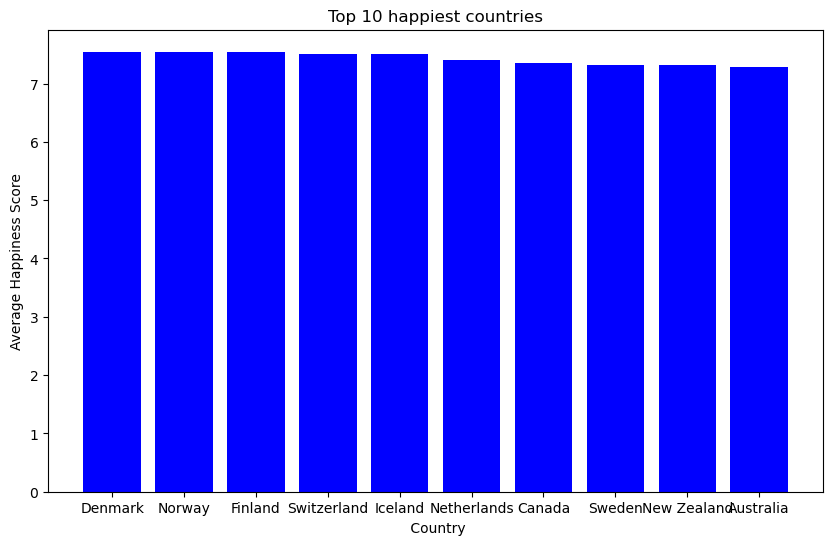

In [380]:
average_values = World_Happiness_v2.groupby('Country')['Happiness Score'].mean().reset_index()
average_values.columns = ['Country', 'Average Happiness Score']
sorted_values = average_values.sort_values(by='Average Happiness Score', ascending=False)
top10 = sorted_values.head(10)
Country_counts = average_values['Average Happiness Score'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(top10['Country'], top10['Average Happiness Score'], color='blue')
plt.title('Top 10 happiest countries')
plt.xlabel(' Country')
plt.ylabel('Average Happiness Score')
plt.show()

<Axes: xlabel='Average Happiness Score', ylabel='Country'>

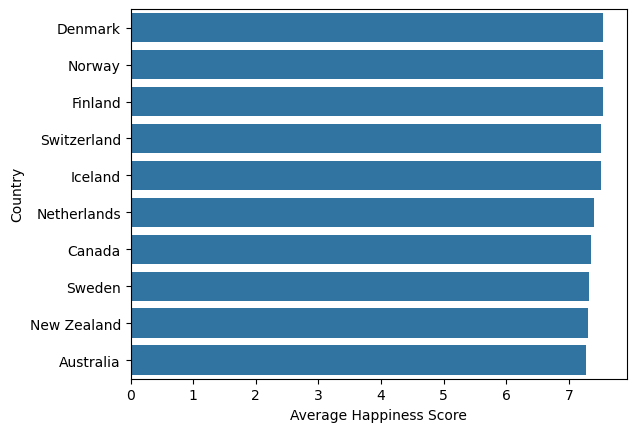

In [388]:
sns.barplot(y="Country", x="Average Happiness Score", data=top10)

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.